

<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Taller 7: Clasificación con RNA</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
    
Técnicas de Inteligencia Artificial - Visión de Máquina </p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
  <br>Est. Brian Camilo Valencia Peña (bcvalenciap@unal.edu.co)
  <br>Est. Esteban Ladino Fajardo (eladinof@unal.edu.co)
</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRÓNICA Y ELECTRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="../figs/Escudo_UN.png",width=100,height=100>

<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>3 de junio de 2022</p>

## Enunciado

1. Estudiar el uso de Redes Neuronales en scikit-learn.
    * Machine Learning with Neural Networks Using scikit-learn https://www.pluralsight.com/guides/
machine-learning-neural-networks-scikit-learn


2. Estudiar, evaluar y discutir el desempeño de las Redes Neuronales Artificiales como clasificador, cuando son aplicadas a un conjunto de vectores de características como el del proyecto que está desarrollando para el curso.


## Desarrollo Punto 1

El siguiente código fue proporcionado por Vargas [rrr1] y el objetivo es comentarlo. 



#### Algoritmo de entrenamiento del Perceptrón

* Una Epoca - por set de características
* Función de Activación: Escalón unitario
* Error: $\varepsilon = \bar{y} - y$, 
Donde,
    * $\bar{y}$: La salida deseada
    * Y: La salida actual 

In [1]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

A continuación, se establecen las características de entrada y se les agrega el bias a la matriz para facilitar los cálculos

[[2.  3.  1. ]
 [8.  7.  1. ]
 [2.5 2.  1. ]
 [6.  4.  1. ]]
[[1.]
 [0.]
 [1.]
 [0.]]


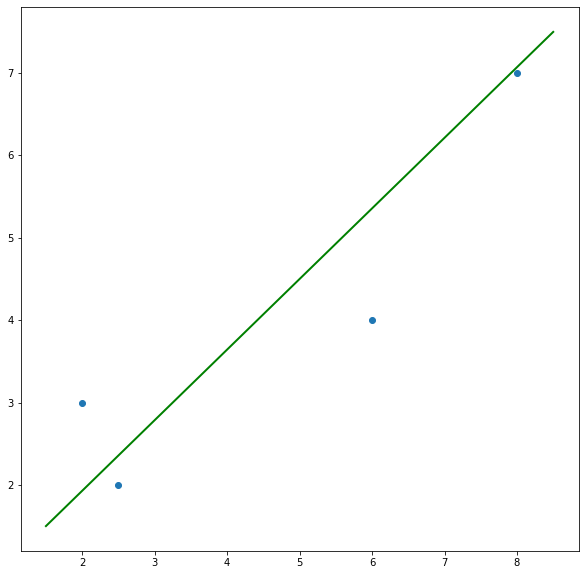

In [2]:
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

#==============================================
#  X: Dataset de entrada en matriz donde cada fila es un ejemplo de entrentamiento
#  El último componente de cada fila hace referencia a un factor neutro que posteriormente 
# se va a multiplicar en la matriz w por un valor de bias. 
X = np.array([  [2.0,3.0,1],
                [8.0,7.0,1],
                [2.5,2.0,1],
                [6.0,4.0,1] ])

#X = np.array([  [2.0,1.0,1],
                #[8.5,9.0,1],
                #[8.0,2.0,1],
                #[1.5,8.5,1] ])

#==============================================
# output dataset   
# y: Dataset de salida Output, matriz donde cada fila es  un ejemplo de enrtenamiento.
# Este es el vector objetivo
y = np.array([[1.0,0.0,1.0,0.0]]).T

print (X)
print (y)

# Se halla el máximo y mínimo en X[:,0] y X[:,1], se le agregan 0.5 y se le restan 0.5 al final.
# Esto se hace para centrar el rango de impresión de la imagen

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.scatter(X[:,0], X[:,1])
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)

##### PASO 1
Se inicializan los pesos de las características y el valor de bias aleatoriamente a través una semilla con la instrucción np.random.seed(1). Estos valores de guardan en el vector de pesos W. En donde, el vector de w en su última posición corresponde el valor de bias multiplicado el número de características del vector de entrenamiento.



In [3]:
# seed random numbers to make calculation
# deterministic (just a good practice)
# Se establece una semilla para obtener los mismos resultados de números aleatorios 
# en diferentes equipos. [rrr2]
np.random.seed(1)

#==========================
#
# initialize weights randomly with mean 0
# syn0: First layer of weights, Synapse 0, connecting l0 to l1.

# Se crea el vector de peso de tamaño igual al de las columnas de manera random
W = np.random.random((X.shape[1])) - 1

# 
W[2]=W[2]*2
print ("\nW0:"); print (W)



W0:
[-0.582978   -0.27967551 -1.99977125]


##### Paso 2
Se evalue el net con la siguiente fórmula:

$$
\sum_{i=1}^n (W_iXi+b)
$$

Por facilidad la operación anterior se realiza a través del producto punto entre el vector caraterísticas X modificado y el vector de peso W en donde su última posición corresponde a valor de bias multiplicado por número de características. En forma general:

$$
net= (X_1, X_2,\cdots,X_n,1) \cdot (W_1, W_2,\cdots,W_n,nb) 
$$

In [4]:


#=========================
#PASO 2
# Se imprime cada X[m], y cada net obtenido a partir del peso W.
# En este caso no se realiza la actualización de pesos ni bias
# sino que se realiza por época (no significa que no exista error
# durante la evaluación).

for m in range(X.shape[0]):
    print ("\n------------------\nm: %d" %m)
    net = np.dot(X[m],W)
    print ("X[m]"); print (X[m])
    print ("net"); print (net)



------------------
m: 0
X[m]
[2. 3. 1.]
net
-4.0047537606336885

------------------
m: 1
X[m]
[8. 7. 1.]
net
-8.621323758649613

------------------
m: 2
X[m]
[2.5 2.  1. ]
net
-4.016567251724559

------------------
m: 3
X[m]
[6. 4. 1.]
net
-6.616341248381234


##### Paso 3

Se calcula el valor de salida según la siguiente función de activación:

$$
y=1\; si \; net \; > 0
$$
$$
y=0\; si \; net \; \leq 0
$$

A continuación, se implementa y se evalua la función de activación para el último vector de características.

In [5]:

#=========================
#PASO 3
#Se establecen las condiciones de salida de la red, en donde dependiendo del valor de net puede ser 0 o 1.

if net > 0: y_cal = 1
else: y_cal = 0
print ("y_cal"); print (y_cal)


y_cal
0


##### Paso 4

Se hace una actualización del peso y del bias así:

![figs/actualizacionPesoBias.png](figs/actualizacionPesoBias.png)


La actualización de pesos y bias al tenerlos en un mismo vector se debe hacer de la siguiente forma:

$$
W_{(k+1)}=(W_1, W_2,\cdots,W_n,b)+\epsilon (X_1, X_2,\cdots,X_n,1) 
$$

Al tener en cuenta que:
$$
W_{(k+1)}=W_k+\epsilon X_i
$$
$$
b_{(k+1)}=b_k+\epsilon 
$$



In [6]:

#=========================
#PASO 4
#Se realizan las comparaciones con el target esperado y se calcula el error.

error = y[m] - y_cal
print ("error");     print (error)

Delta = error*X[m]
print ("Delta");     print (Delta)

# update weights
# Se realiza la actualización de pesos para la siguiente iteración
n=len(W)-1
W[n]=W[n]/n
W = W + Delta.T
W[n]=W[n]*n
print ("W"); print (W)

#===========================================
#===========================================

y_min = (-W[0]*x_min - W[2])/W[1]
y_max = (-W[0]*x_max - W[2])/W[1]

# plt.scatter(X[:,0], X[:,1])
# plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)

error
[0.]
Delta
[0. 0. 0.]
W
[-0.582978   -0.27967551 -1.99977125]


Nótese que para actualizar el vector de pesos y de bias se debe dividir por el número de caractísticas de la última posición y despúes de actualizar volver a multiplicar por el número de características.

##### Paso 5 y 6
Se deben repetir los pasos 2-4 hasta que los pesos no cambien o se llegue hasta el máximo número de iteraciones en todas las muestra de entrenamiento. En la siguiente función se realizan los pasos descritos anteriormente.

In [7]:
# MUCHAS ÉPOCAS
def entrenamientoPerceptron(X,y,W,interaciones):
    n_caracteristicas=X.shape[1]-1
    W[n_caracteristicas]=W[n_caracteristicas]*n_caracteristicas
    y=y.T

    interacionesFinales=0
    
    for j in range(interaciones):
        
        Nerrors = 0
        #=========================
        #PASO 2
        for m in range(X.shape[0]):
            net = np.dot(X[m],W)
            
        #=========================
        #PASO 3
            if net > 0: y_cal = 1
            else: y_cal = 0
        #=========================
        #PASO 4
            error = y[m] - y_cal
            Delta = error*X[m]
            # update weights
            W[n_caracteristicas]=W[n_caracteristicas]/n_caracteristicas
            W = W + Delta
            W[n_caracteristicas]=W[n_caracteristicas]*n_caracteristicas

            # print(f'Época: {j+1}\ncaracterística: {m+1}')
            # print(f'W: {W}\n')

            if error != 0: 
                Nerrors = Nerrors+1
        
        interacionesFinales=j+1

        if Nerrors == 0: 
            break
        #===========================================
        #===========================================

    W[n_caracteristicas]=W[n_caracteristicas]/n_caracteristicas
    return [W,interacionesFinales]

## Ejercicio de ejemplo
interaciones=1
X=np.array([
    [2.0,3.0,1],
    [2.5,2.0,1],
    [8.0,7.0,1],
    [6.0,4.0,1]
])

y=np.array([1.0,1.0,0.0,0.0]) # EN vector fila

W=np.array([0.1,0.1,0.1])
finalW,epocas=entrenamientoPerceptron(X,y,W,interaciones)


La frontera de decisión queda determinada por la siguiente ecuación:

$$
X_1W_1+X_2W_2+2b=0
$$

Los valores que se encuentren por encima de la linea son mayores a cero y por lo tanto pertenecen a la clase 1 y los valores que se encuentren por debajo pertenecen a la clase 2. Al tomar a $X_1$ con la variable independiente y $X_2$ como la independiente se puede obtener la línea de decisión y los datos como se muestra a continuación:

$$
X_2= -\frac{1}{W_2}(X_1W_1+2b) 
$$


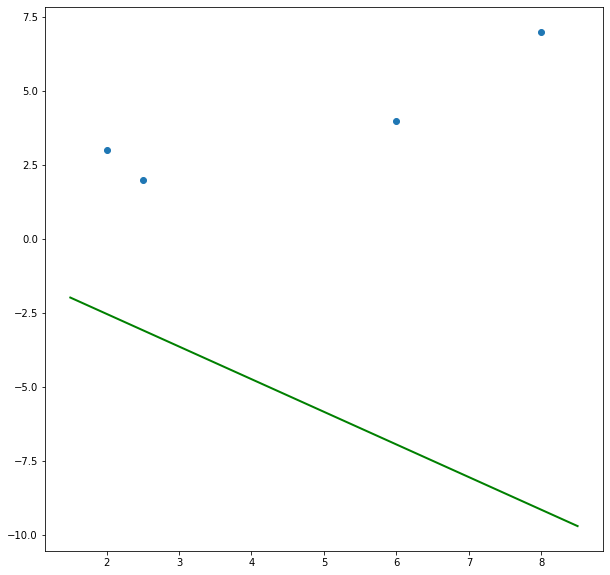

In [8]:
## valor mínimo menos .5 y valor máximo más .5 en la variable independiente 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5

y_min = (-finalW[0]*x_min - 2*finalW[2])/finalW[1]
y_max = (-finalW[0]*x_max - 2*W[2])/finalW[1]

plt.scatter(X[:,0], X[:,1])
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)

# ADALINE

* Función de Activación: Identidad o función lineal
* Error: $\varepsilon = \frac{1}{2}(\bar{y}-y)^2$, 
* El adaline (de ADAptative LINear Element) es un tipo de red neuronal artificial cuyo modelo está basado en la Neurona de McCulloch-Pitts. Generalmente se compone de una sola capa de n neuronas ( por tanto n valores de salida ) con m entradas. [bbb1]
* A diferencia del perceptrón, cuando se modifican los pesos durante el entrenamiento, el Adaline tiene en cuenta el grado de corrección de la salida estimada respecto a la deseada.​ Para esto se aplica la regla Delta, la cual para un patrón de entrada $X^p$ con una salida estimada $Y^p$ y una salida deseada $d^p$, como $|d^p-y^p|$ [bbb1]
* "Con respecto al perceptrón, el Adaline posee la ventaja de que su gráfica de error es un hiperparaboloide que posee o bien un único mínimo global, o bien una recta de infinitos mínimos, todos ellos globales. Esto evita la gran cantidad de problemas que da el perceptrón a la hora del entrenamiento debido a que su función de error (también llamada de coste) posee numerosos mínimos locales."[bbb1]


W0:
[-0.99165956 -0.98559351 -0.99999771]

------------------
m: 0
y_cal
-5.940097362709021
error
6.940097362709021
Delta
[0.27760389 0.41640584 0.13880195]
W
[-0.71405567 -0.56918767 -0.86119577]

------------------
m: 1
y_cal
-3.7847102654806735
error
4.7847102654806735
Delta
[0.23923551 0.19138841 0.09569421]
W
[-0.47482015 -0.37779926 -0.76550156]

------------------
m: 2
y_cal
-7.208657581174013
error
7.208657581174013
Delta
[1.15338521 1.00921206 0.14417315]
W
[ 0.67856506  0.6314128  -0.62132841]

------------------
m: 3
y_cal
5.975713171329241
error
-5.975713171329241
Delta
[-0.71708558 -0.47805705 -0.11951426]
W
[-0.03852052  0.15335575 -0.74084267]


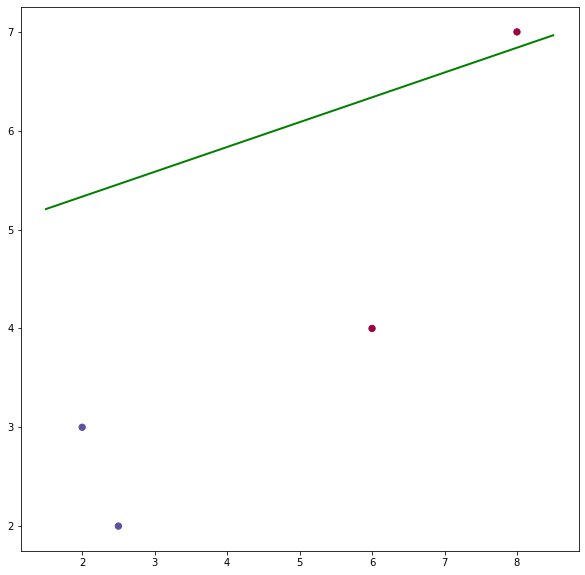

In [9]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

#==========================
# PASO 1
W = 0.02*np.random.random((X.shape[1])) - 1
print ("\nW0:"); print (W)

#a: VALOR CRITICO
a = 0.02
#=========================
#PASO 2

for m in range(X.shape[0]):
    print ("\n------------------\nm: %d" %m)
    y_cal = np.dot(X[m],W)
    print ("y_cal"); print (y_cal)

#=========================
#PASO 3
    
    error = y[m] - y_cal
    print ("error");     print (error)
    Delta = a*error*X[m]
    print ("Delta");     print (Delta)

#=========================
#PASO 4

    # update weights
    W = W + Delta
    print ("W");     print (W)

#===========================================
#===========================================

y_min = (-W[0]*x_min - W[2])/W[1]
y_max = (-W[0]*x_max - W[2])/W[1]

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)